# Week 2: Linear Regression

## Linear Regression 1D

In [23]:
%%time
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

print(torch.cuda.is_available())

False
CPU times: user 1.24 ms, sys: 190 µs, total: 1.43 ms
Wall time: 1.46 ms


In [2]:
w = torch.tensor(-10.0, requires_grad=True)
w

tensor(-10., requires_grad=True)

In [3]:
X = torch.arange(-3,3,0.1).view(-1,1)
X

tensor([[-3.0000e+00],
        [-2.9000e+00],
        [-2.8000e+00],
        [-2.7000e+00],
        [-2.6000e+00],
        [-2.5000e+00],
        [-2.4000e+00],
        [-2.3000e+00],
        [-2.2000e+00],
        [-2.1000e+00],
        [-2.0000e+00],
        [-1.9000e+00],
        [-1.8000e+00],
        [-1.7000e+00],
        [-1.6000e+00],
        [-1.5000e+00],
        [-1.4000e+00],
        [-1.3000e+00],
        [-1.2000e+00],
        [-1.1000e+00],
        [-1.0000e+00],
        [-9.0000e-01],
        [-8.0000e-01],
        [-7.0000e-01],
        [-6.0000e-01],
        [-5.0000e-01],
        [-4.0000e-01],
        [-3.0000e-01],
        [-2.0000e-01],
        [-1.0000e-01],
        [-2.3842e-08],
        [ 1.0000e-01],
        [ 2.0000e-01],
        [ 3.0000e-01],
        [ 4.0000e-01],
        [ 5.0000e-01],
        [ 6.0000e-01],
        [ 7.0000e-01],
        [ 8.0000e-01],
        [ 9.0000e-01],
        [ 1.0000e+00],
        [ 1.1000e+00],
        [ 1.2000e+00],
        [ 1

In [4]:
f = -3*X
f

tensor([[ 9.0000e+00],
        [ 8.7000e+00],
        [ 8.4000e+00],
        [ 8.1000e+00],
        [ 7.8000e+00],
        [ 7.5000e+00],
        [ 7.2000e+00],
        [ 6.9000e+00],
        [ 6.6000e+00],
        [ 6.3000e+00],
        [ 6.0000e+00],
        [ 5.7000e+00],
        [ 5.4000e+00],
        [ 5.1000e+00],
        [ 4.8000e+00],
        [ 4.5000e+00],
        [ 4.2000e+00],
        [ 3.9000e+00],
        [ 3.6000e+00],
        [ 3.3000e+00],
        [ 3.0000e+00],
        [ 2.7000e+00],
        [ 2.4000e+00],
        [ 2.1000e+00],
        [ 1.8000e+00],
        [ 1.5000e+00],
        [ 1.2000e+00],
        [ 9.0000e-01],
        [ 6.0000e-01],
        [ 3.0000e-01],
        [ 7.1526e-08],
        [-3.0000e-01],
        [-6.0000e-01],
        [-9.0000e-01],
        [-1.2000e+00],
        [-1.5000e+00],
        [-1.8000e+00],
        [-2.1000e+00],
        [-2.4000e+00],
        [-2.7000e+00],
        [-3.0000e+00],
        [-3.3000e+00],
        [-3.6000e+00],
        [-3

/home/tuan/miniconda3/envs/pytorch-learning/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/tuan/miniconda3/envs/pytorch-learning/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

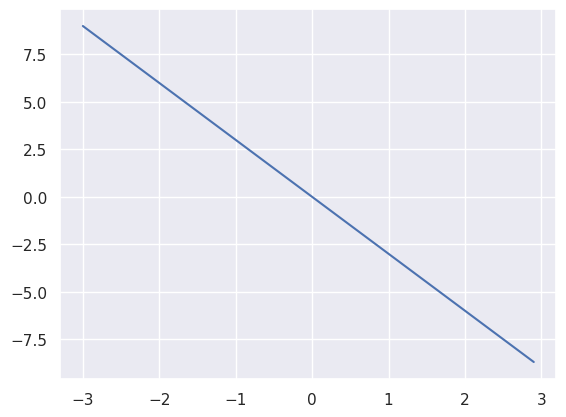

In [15]:
sns.lineplot(x=torch.transpose(X, 0, 1)[0],y=torch.transpose(f, 0, 1)[0])

In [16]:
Y=f+0.1*torch.randn(X.size())
Y

tensor([[ 8.9431],
        [ 8.6198],
        [ 8.2898],
        [ 7.9734],
        [ 7.9560],
        [ 7.4487],
        [ 7.1145],
        [ 6.8838],
        [ 6.4644],
        [ 6.3313],
        [ 6.0522],
        [ 5.6932],
        [ 5.4208],
        [ 5.0895],
        [ 4.9669],
        [ 4.3984],
        [ 4.4121],
        [ 3.8163],
        [ 3.5168],
        [ 3.3583],
        [ 2.8459],
        [ 2.6085],
        [ 2.3705],
        [ 2.3097],
        [ 1.6939],
        [ 1.5310],
        [ 1.2452],
        [ 0.9958],
        [ 0.5618],
        [ 0.3163],
        [ 0.0267],
        [-0.2913],
        [-0.5571],
        [-0.9739],
        [-1.3383],
        [-1.4901],
        [-1.8361],
        [-2.2346],
        [-2.5876],
        [-2.6227],
        [-2.9756],
        [-3.3508],
        [-3.6299],
        [-3.9173],
        [-4.1286],
        [-4.7566],
        [-4.8301],
        [-5.0476],
        [-5.3206],
        [-5.6948],
        [-6.1410],
        [-6.5645],
        [-6.

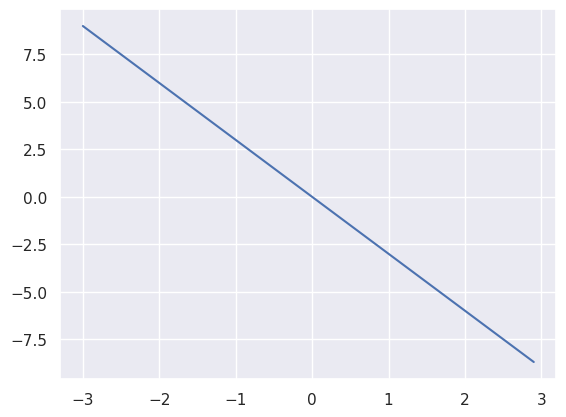

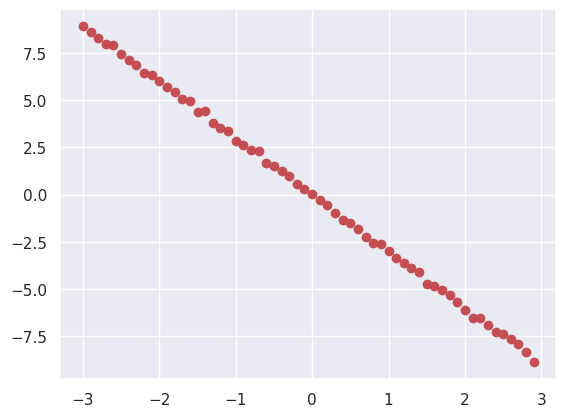

In [26]:
plt.plot(X.numpy(), f.numpy())
plt.show()
plt.plot(X.numpy(), Y.numpy(), "ro")
plt.show()

In [27]:
def forward(x):
    return w * X

def criterion(yhat, y):
    return torch.mean((yhat-y)**2)

In [29]:
lr=0.1
cost = []
for epoch in range(4):
    yhat = forward(X)
    loss = criterion(yhat,Y)
    loss.backward()
    print(w.grad)
    w.data = w.data-lr*w.grad.data
    w.grad.data.zero_()
    cost.append(loss.item())

tensor(-42.0354)
tensor(-16.8002)
tensor(-6.7145)
tensor(-2.6835)


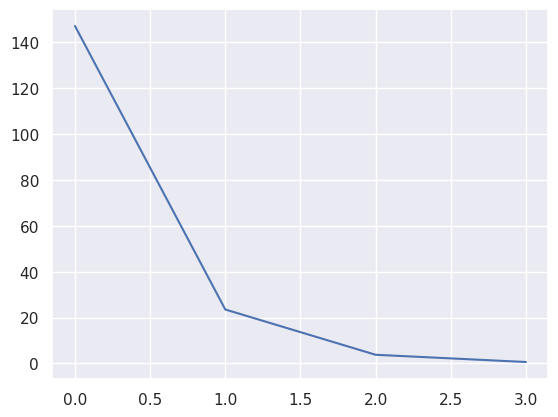

In [31]:
plt.plot(cost)
plt.show()